In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from yolo_helpers import *

12 [[508 322 543 344]]


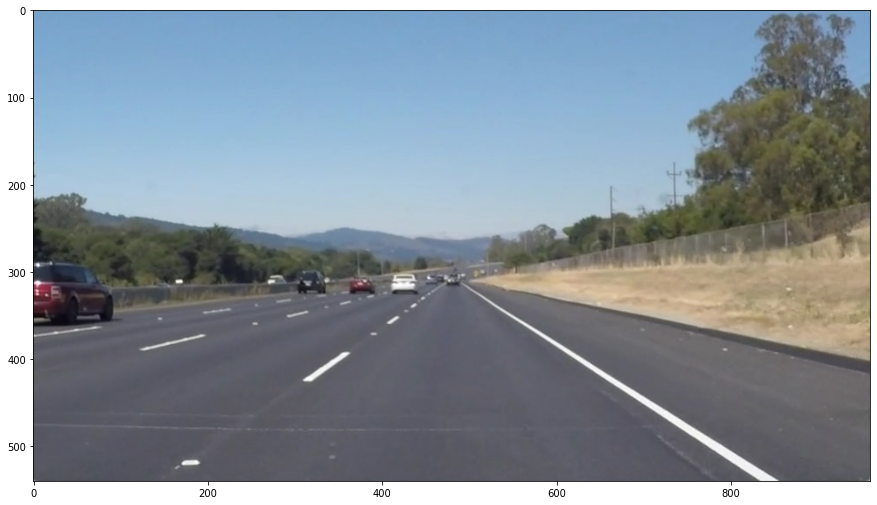

In [2]:
img1_original = cv2.cvtColor(cv2.imread('images/solidWhiteRight.jpg'), cv2.COLOR_BGR2RGB)
# gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1 = img1_original.copy()
img_final = img1_original.copy()

hsv = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)

lower_bounds = (0,0,20)
upper_bounds = (180,8,255)
mask = cv2.inRange(hsv, lower_bounds, upper_bounds)

img1[mask == 0] = [0,0,0]

blur = cv2.GaussianBlur(img1, (3,3), 0)

gray = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 800, 200)

lines2 = cv2.HoughLinesP(edges, 1, np.pi/180, 35, minLineLength=22, maxLineGap=10)
print(len(lines2), lines2[0])

margin = 0.2
l = []
first = 0

# for line in lines2:
#     x1,y1, x2,y2 = line[0]
#     m = (y2-y1) / (x2-x1)
#     n = y2 - m*x2
#     # print(m,n)

#     if first == 0:
#         cv2.line(img_final, (x1,y1), (x2,y2), (0,0,255), 2)
#         l.append((m,n))
#         first += 1

#     for line_painted in l:
#         print(len(l))
#         c1 = (m > line_painted[0] * (1-margin))
#         c2 = (m < line_painted[0] * (1+margin))
#         c3 = (n > line_painted[1] * (1-margin))
#         c4 = (n < line_painted[1] * (1+margin))

#         # if ((m > line_painted[0] * (1-margin)) or (m < line_painted[0] * (1+margin))) and ((n > line_painted[1] * (1-margin)) or (n < line_painted[1] * (1+margin))):
#         if (c1 and c2) and (c3 and c4):
#             # print(c3)
#             # print(c4)
#             # print(n, line_painted[1] * (1-margin))
#             # print(n, line_painted[1] * (1+margin))
#             pass
#         else:
#             cv2.line(img_final, (x1,y1), (x2,y2), (0,0,255), 2)
#             l.append((m,n))

    
#     print('done')
# print(len(l))
plt.figure(figsize=(15,10))
plt.imshow(img_final, cmap='gray')

# cv2.imshow('image', mask)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(1)

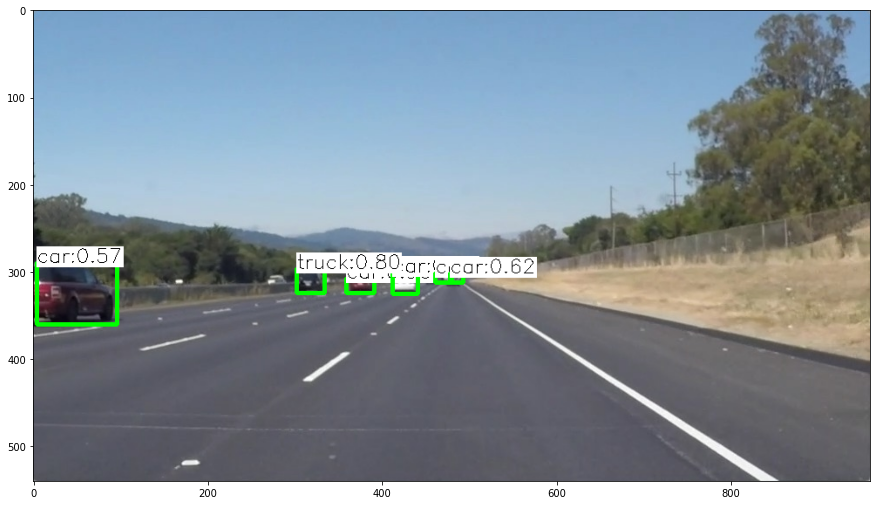

In [3]:
models_configuration_path = 'models/yolov3.cfg'
models_weights_path = 'models/yolov3.weights'
net = cv2.dnn.readNetFromDarknet(models_configuration_path, models_weights_path)
blob = cv2.dnn.blobFromImage(img1_original, 1/255.0, (416,416), swapRB=True)

net.setInput(blob)
output_layers = net.getUnconnectedOutLayersNames()
predictions = net.forward(output_layers)
postprocess(img_final, predictions)

plt.figure(figsize=(15,10))
plt.imshow(img_final)